# Introduction
In this experiment we would fit two functions, $e^x$ and cos(cos(x)) using fourier series.
We would make use of functions of external librariers such as scipy and pylab to perform
various tasks of the experiment.

The fourier series of any function can be represented as follows:

\begin{equation}
    a_{0} + \sum\limits_{n=1}^{\infty} {{a_{n}\cos(nx_{i})+b_{n}\sin(nx_{i})}} \approx f(x_{i})              - (1)
    \end{equation}
The equations which are used to find the Fourier coefficients are as follows:
    \begin{equation}
         a_{0} = \frac{1}{2\pi}\int\limits_{0}^{2\pi} f(x)dx                                                 - (2)
    \end{equation}
    \begin{equation}
         a_{n} = \frac{1}{\pi}\int\limits_{0}^{2\pi} f(x)\cos(nx)dx                                          - (3)
    \end{equation}
    \begin{equation}
         b_{n} = \frac{1}{\pi}\int\limits_{0}^{2\pi} f(x)\sin(nx)dx                                          - (4)
    \end{equation}

# Generated Outputs & Code :

In [1]:
import math
import numpy as np
from pylab import *
import scipy.integrate as integrate
import scipy

## Part 1
Plotting the given functions - exp(x) and cos(cos(x))

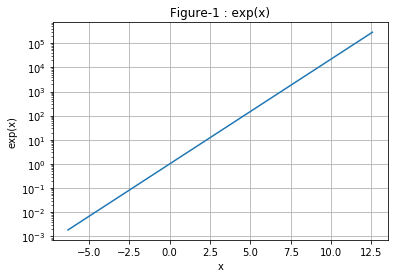

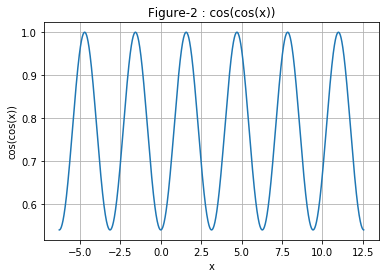

In [2]:
x = np.arange(-2*np.pi,4*np.pi,0.01)
title('Figure-1 : exp(x)')
xlabel('x')
ylabel('exp(x)')
grid()
expx = np.exp(x)
semilogy(x,expx)
show()
title("Figure-2 : cos(cos(x))")
xlabel('x')
ylabel('cos(cos(x))')
grid()
coscosx = np.cos(np.cos(x))
plot(x,coscosx)
show()

Plotting the functions expected to be generated by the Fourier series. This is done by reapeating the plot between 0 and 2$\pi$ for all other intervals which can be done by taking the value of funciton at *x%2$\pi$* for the function value at x. 

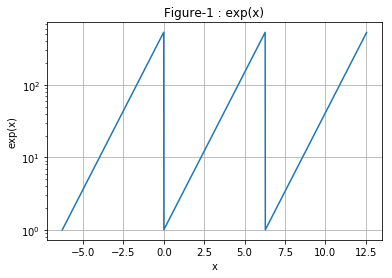

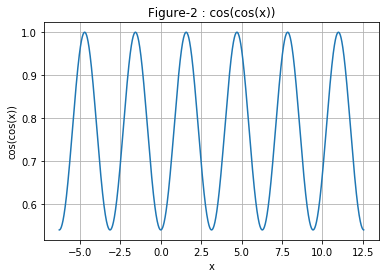

In [3]:
xx = x%(2*np.pi)
title('Figure-1 : exp(x)')
xlabel('x')
ylabel('exp(x)')
grid()
expx = np.exp(xx)
semilogy(x,expx)
show()
title("Figure-2 : cos(cos(x))")
xlabel('x')
ylabel('cos(cos(x))')
grid()
coscosx = np.cos(np.cos(xx))
plot(x,coscosx)
show()

## Part 2
Generating the fourier series coefficients using the formula. We use *integrate.quad* as mentioned. Before that, we define functions *u(x,k)* and *v(x,k)* for passing it to *quad*.

In [4]:
def exp(x): 
    return np.exp(x)
def coscosx(x):
    return np.cos(np.cos(x))
def uxk(x,f,k):     # returns f(x).cos(kx)
    return f(x)*np.cos(k*x)
def vxk(x,f,k):     # returns f(x).sin(kx)
    return f(x)*np.sin(k*x)

After defining necessary functions, we iterate from 1 to 51 and find the corresponding fourier coefficients using *quad*.

In [5]:
an1 = []; bn1 = []; ans1 = []
an1.append(integrate.quad(exp,0,2*pi)[0]/(2*pi))
ans1.append(an1[-1])
print('Generated fourier series coefficients for exp(x)')
#print('a0 = '+str(round(an1[-1],5)))
for i in range(1,51,1):
    a = integrate.quad(uxk,0,2*pi,args=(exp,i))[0]/pi
    b = integrate.quad(vxk,0,2*pi,args=(exp,i))[0]/pi
    #print('a'+str(i)+' = '+str(round(a,5))+'   b'+str(i)+' = '+str(round(b,5)))
    ans1.append(a); an1.append(a)
    ans1.append(b); bn1.append(b)

Generated fourier series coefficients for exp(x)


In [6]:
an2 = []; bn2 = []; ans2 = []
an2.append(integrate.quad(coscosx,0,2*pi)[0]/(2*pi))
ans2.append(an2[-1])
print('Generated fourier series coefficients for cos(cos(x))')
#print('a0 = '+str(round(an2[-1],5)))
for i in range(1,51,1):
    a = integrate.quad(uxk,0,2*pi,args=(coscosx,i))[0]/pi
    b = integrate.quad(vxk,0,2*pi,args=(coscosx,i))[0]/pi
    # print('a'+str(i)+' = '+str(round(a,5))+'   b'+str(i)+' = '+str(round(b,5)))
    an2.append(a); ans2.append(a)
    bn2.append(b); ans2.append(b)

Generated fourier series coefficients for cos(cos(x))


## Part 3
Plotting the fourier coefficients vs n in semilogy and loglog.

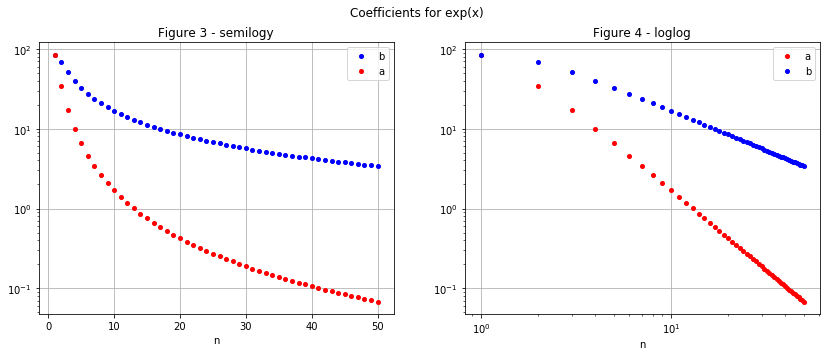

In [7]:
ann1 = np.abs(np.array(an1))
bnn1 = np.abs(np.array(bn1))
f = figure(figsize=(14,5))
f.suptitle('Coefficients for exp(x)')
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
ax.title.set_text('Figure 3 - semilogy')
ax.semilogy(range(1,51),bnn1,'bo',label='b',markersize=4)
ax.semilogy(range(1,51),ann1[1:],'ro',label='a',markersize=4)
ax.set_xlabel('n')
ax1.title.set_text('Figure 4 - loglog')
ax1.loglog(range(1,51),ann1[1:],'ro',label='a',markersize=4)
ax1.loglog(range(1,51),bnn1,'bo',label='b',markersize=4)
ax1.set_xlabel('n')
ax.grid()
ax1.grid()
ax.legend()
ax1.legend()
show()

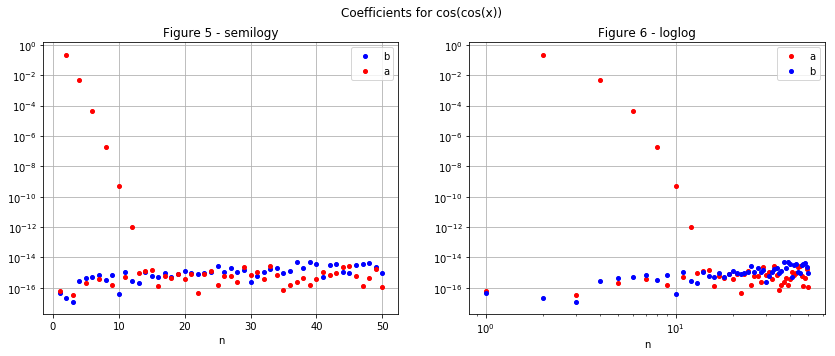

In [8]:
ann2 = np.abs(np.array(an2))
bnn2 = np.abs(np.array(bn2))
f = figure(figsize=(14,5))
f.suptitle('Coefficients for cos(cos(x))')
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
ax.title.set_text('Figure 5 - semilogy')
ax.semilogy(range(1,51),bnn2,'bo',label='b',markersize=4)
ax.semilogy(range(1,51),ann2[1:],'ro',label='a',markersize=4)
ax1.title.set_text('Figure 6 - loglog')
ax1.loglog(range(1,51),ann2[1:],'ro',label='a',markersize=4)
ax1.loglog(range(1,51),bnn2,'bo',label='b',markersize=4)
ax1.set_xlabel('n')
ax.set_xlabel('n')
ax.grid()
ax1.grid()
ax.legend()
ax1.legend()
show()

Answers for the questions :
- As $\cos(\cos(x))$ is an even function and for finding $b_n$ we use Eq.(4) so the whole integral is integrated in     interval $[-\pi,\pi)$ , then the integrand is odd since $\sin(nx)$ is there. so the integral becomes zero analytically. Where as here we compute using quad function which uses numerical methods so $b_n$ is very small but not exactly zero.
- The rate of decay of fourier series coefficients is related to the function's differentiability. If the function is infinitely differentiable, then the coefficients decay faster.
- As the coefficients of $e^x$ varies as $n^k$ where as $\cos(\cos(x)$ varies exponentially with 'n' means $\alpha^n$ ,thats why loglog looks linear in first case and semilog in second case.

## Part 4
We are going to apply *Least Squares Approach*, the following code was given to generate the corresponding A and b matrices from which we can solve the coeffecient vector using *linalg.lstsq*.

In [9]:
x= np.linspace(0,2*pi,401)
x= x[:-1] # drop last term to have a proper periodic integral
b1 = np.exp(x) # f has been written to take a vector
b2 = np.cos(np.cos(x))
A= np.zeros((400,51)) # allocate space for A
A[:,0]=1 # col 1 is all ones
for k in range(1,26):
    A[:,2*k-1]=np.cos(k*x) # cos(kx) column
    A[:,2*k]=np.sin(k*x) # sin(kx) column
#endfor
c1 = scipy.linalg.lstsq(A,b1)[0] 
c2 = scipy.linalg.lstsq(A,b2)[0] # the ’[0]’ is to pull out the
# best fit vector. lstsq returns a list.

## Part 5
Now we plot the obtained coefficients above along with the coeffecients obtained through integration to see how they vary from each other.

In [10]:
pa10 = c1[0]
pan1 = []
pbn1 = []
for i in range(1,len(c1)):
    if(i%2==1):
        pan1.append(abs(c1[i]))
    else:
        pbn1.append(abs(c1[i]))

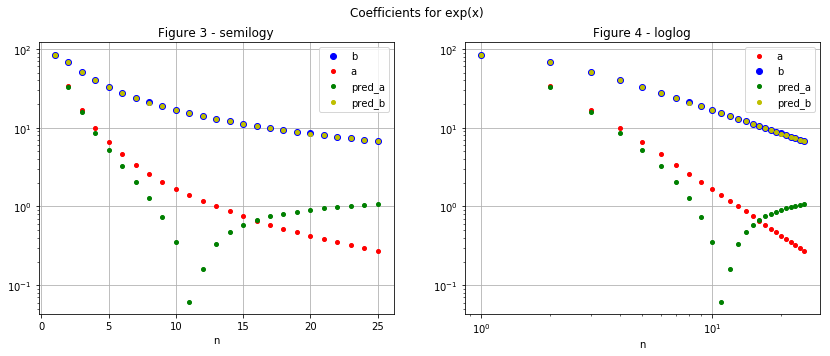

In [11]:
ann1 = np.abs(np.array(an1))
bnn1 = np.abs(np.array(bn1))
f = figure(figsize=(14,5))
f.suptitle('Coefficients for exp(x)')
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
ax.title.set_text('Figure 3 - semilogy')
ax.semilogy(range(1,26),bnn1[:25],'bo',label='b',markersize=6)
ax.semilogy(range(1,26),ann1[1:26],'ro',label='a',markersize=4)
ax.semilogy(range(1,26),pan1,'go',label='pred_a',markersize=4)
ax.semilogy(range(1,26),pbn1,'yo',label='pred_b',markersize=4)
ax1.title.set_text('Figure 4 - loglog')
ax1.loglog(range(1,26),ann1[1:26],'ro',label='a',markersize=4)
ax1.loglog(range(1,26),bnn1[:25],'bo',label='b',markersize=6)
ax1.loglog(range(1,26),pan1,'go',label='pred_a',markersize=4)
ax1.loglog(range(1,26),pbn1,'yo',label='pred_b',markersize=4)
ax1.set_xlabel('n')
ax.set_xlabel('n')
ax.grid()
ax1.grid()
ax.legend()
ax1.legend()
show()

In [12]:
pa20 = c1[0]
pan2 = []
pbn2 = []
for i in range(1,len(c2)):
    if(i%2==1):
        pan2.append(abs(c2[i]))
    else:
        pbn2.append(abs(c2[i]))

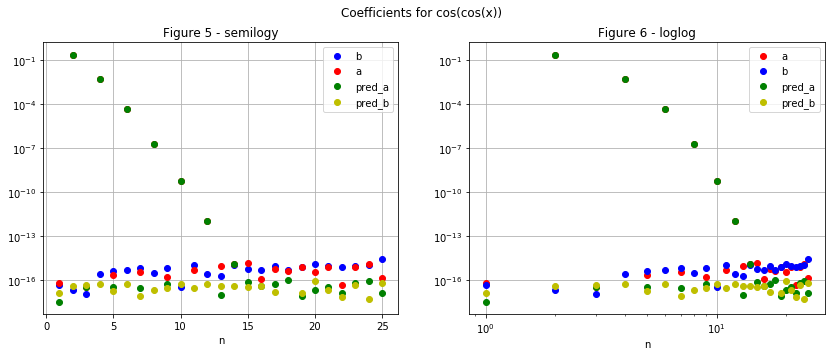

In [13]:
ann1 = np.abs(np.array(an2))
bnn1 = np.abs(np.array(bn2))
f = figure(figsize=(14,5))
f.suptitle('Coefficients for cos(cos(x))')
ax = f.add_subplot(121)
ax1 = f.add_subplot(122)
ax.title.set_text('Figure 5 - semilogy')
ax.semilogy(range(1,26),bnn1[:25],'bo',label='b',markersize=6)
ax.semilogy(range(1,26),ann1[1:26],'ro',label='a',markersize=6)
ax.semilogy(range(1,26),pan2,'go',label='pred_a',markersize=6)
ax.semilogy(range(1,26),pbn2,'yo',label='pred_b',markersize=6)
ax1.title.set_text('Figure 6 - loglog')
ax1.loglog(range(1,26),ann1[1:26],'ro',label='a',markersize=6)
ax1.loglog(range(1,26),bnn1[:25],'bo',label='b',markersize=6)
ax1.loglog(range(1,26),pan2,'go',label='pred_a',markersize=6)
ax1.loglog(range(1,26),pbn2,'yo',label='pred_b',markersize=6)
ax1.set_xlabel('n')
ax.set_xlabel('n')
ax.grid()
ax1.grid()
ax.legend()
ax1.legend()
show()

## Part 6
Comparing predicted coefficients with previously calculated coefficients (through integration).

In [14]:
print('For exp(x), the maximum deviation from original coefficients:')
ans = ans1[:51]
print(max(np.abs(np.array(ans)-np.array(c1))))
print('For cos(cos(x)), the maximum deviation from original coefficients:')
ans = ans2[:51]
print(max(np.abs(np.array(ans)-np.array(c2))))

For exp(x), the maximum deviation from original coefficients:
1.332730870335439
For cos(cos(x)), the maximum deviation from original coefficients:
2.674677035413032e-15


## Part 7
Plotting the predicted values of the function calculated with the predicted fourier coefficients (by matrix multiplication using *np.matmul*) with the original values to see the difference.

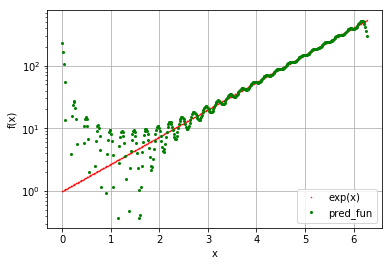

In [15]:
semilogy(x,exp(x),'ro',markersize=0.5,label='exp(x)')
semilogy(x,np.matmul(A,c1),'go',markersize=2,label='pred_fun')
xlabel('x')
ylabel('f(x)')
legend()
grid()
show()

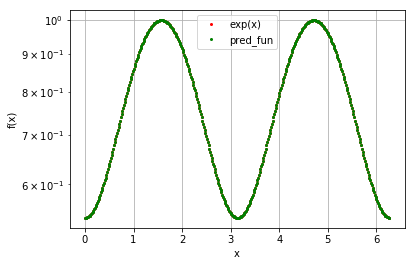

In [16]:
semilogy(x,np.cos(cos(x)),'ro',markersize=2,label='exp(x)')
semilogy(x,np.matmul(A,c2),'go',markersize=2,label='pred_fun')
xlabel('x')
ylabel('f(x)')
legend(loc='upper center')
grid()
show()

- We can see that there is a large deviation is the $e^x$ graph, while there is a very small deviation (close to zero), in the graph of $\cos(\cos(x))$.
- This is because, $e^x$ is an aperiodic function and we know that fourier series is always periodic. So, here we are trying to fit a signal of infinte period into a finite period, this will lead to loss in information and hence, the fourier approximation will not be that accurate. This problem is not encountered while fitting the function $\cos(\cos(x))$, as it is a periodic function.

# Conclusion
- From this experiment we can see that fourier series approximation works for functions which are periodic like $\cos(\cos(x))$.
- Fourier series approximation fails to work on functions which are aperiodic like $e^x$ (monotonic).
- The convergence rate of the fourier coefficients totally depends upon the differentialbility of the given function.